In [8]:
### 샘플데이터를 통한 선형회귀분석을 실습해보자 
### linear_regression(선형회귀분석).pdf 참고 
'''
회귀분석 - 보스턴 집값 예측
 예측(prediction)문제 - 특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것
 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis) 문제라고 합니다
'''
'''
보스턴 주택 가격 데이터 독립변수 
CRIM: 범죄율 
INDUS: 비소매상업지역 면적 비율 
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
    
종속변수
보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


boston = load_boston()
dir(boston) #['DESCR', 'data', 'feature_names', 'filename', 'target']
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


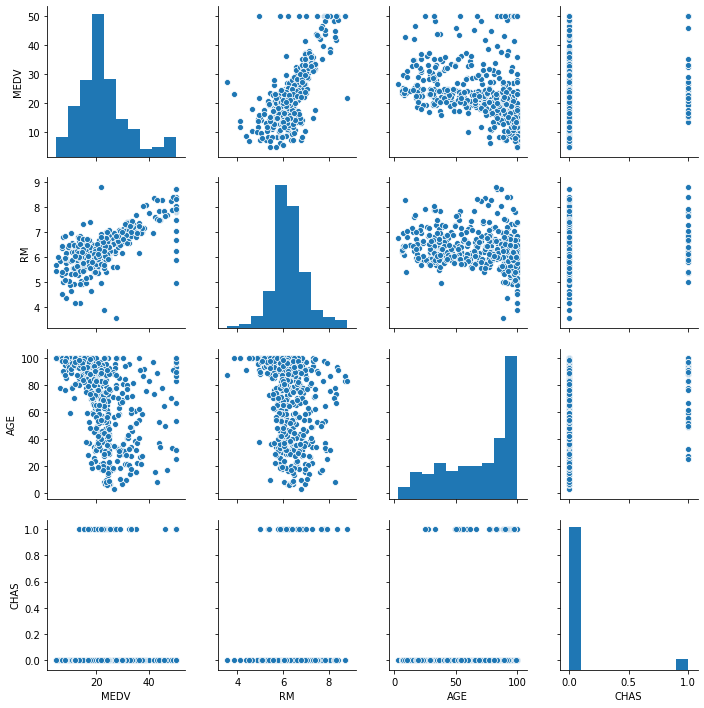

In [9]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

#종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 어떤 관계를 가지는지 알 수 있다.
#방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.
#노후화 정도와 집값은 관계가 없어 보인다.

In [10]:
'''
회귀분석 - 당뇨병 진행도 예측
 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.
 10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.
'''
'''
독립변수
age: 나이 
sex: 성별
bmi: BMI(Body mass index)지수
bp: 평균혈압
s1~s6: 6종류의 혈액검사수치

종속변수
1년 뒤 측정한 당뇨병의 진행률
'''
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


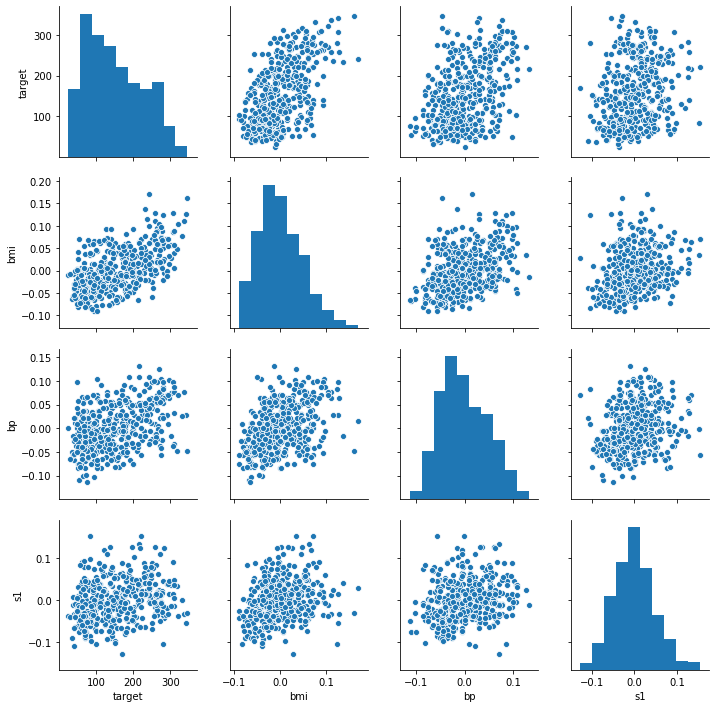

In [11]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()
#독립변수인 BMI지수와 평균혈압이 종속변수인 당뇨병 진행도와 양의 상관관계를 가지는 것을 볼 수 있다.
#또한 두 독립변수 BMI지수와 평균혈압도 서로 양의 상관관계를 가진다.
#이렇게 독립변수끼리 상관관계를 가지는 것을 다중공선성(multicolinearity)이라고 한다.
#다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다
'''다중 공선성
다중공선성문제는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 
독립변수들간에 정확한 선형관계가 존재하는 완전공선성의 경우와 독립변수들간에 높은 선형관계가 
존재하는 다중공선성으로 구분하기도 한다.
'''

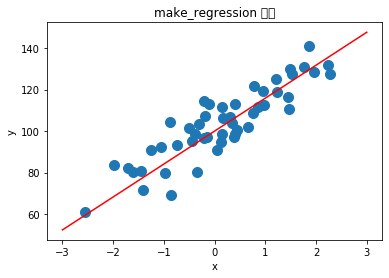

In [19]:
'''
회귀분석 – 가상 데이터 예측
X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)
n_samples : 정수 (옵션, 디폴트 100) 표본 데이터의 갯수 N
n_features : 정수 (옵션, 디폴트 100) 독립변수(feature)의 수(차원) M
bias : 실수 (옵션, 디폴트 0) y 절편
noise : 실수 (옵션, 디폴트 0) 출력 즉, 종속변수에 더해지는 잡음 ϵ 의 표준편차
random_state : 정수 (옵션, 디폴트 None)난수 발생용 시드값
coef : 불리언 (옵션, 디폴트 False) True 이면 선형 모형의 계수도 출력
X : [n_samples, n_features] 형상의 2차원 배열, 독립변수의 표본 데이터 행렬 X
y : [n_samples] 형상의 1차원 배열, 종속변수의 표본 데이터 벡터 y
w : [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열 (옵션)
선형 모형의 계수 벡터 w , 입력 인수 coef가 True 인 경우에만 출력됨
n_informative : 정수 (옵션, 디폴트 10) , 독립변수(feature) 중 실제로 종속변수와 상관 관계가 있는 독립변수의 수(차원)
effective_rank: 정수 또는 None (옵션, 디폴트 None)
독립변수(feature) 중 서로 독립인 독립변수의 수. 만약 None이면 모두 독립
tail_strength : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
effective_rank가 None이 아닌 경우 독립변수간의 상관관계를 결정하는 변수. 0.5면 독립변수간의 상관관계가 없다.
'''
import numpy as np
from sklearn.datasets import make_regression
import matplotlib as mpl
X, y, w = make_regression( n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0 )
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

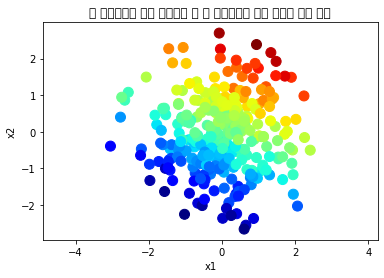

In [28]:
X, y, w = make_regression( n_samples=300, n_features=2, noise=10, coef=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.jet) #cmap: 컬러맵 지정(그 중 bone이란 값을 지정)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.show()

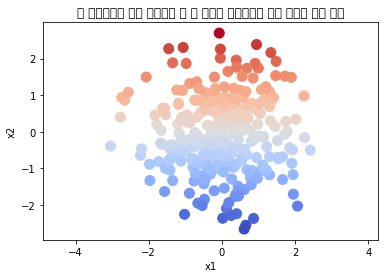

In [30]:
X, y, w = make_regression( n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.coolwarm)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45772 missing from current font.
  font.set_text(s, 0, flags=flags)


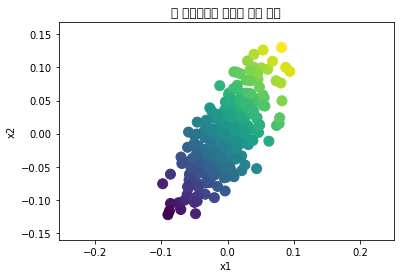

In [32]:
X, y, w = make_regression( n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
tail_strength=0 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.viridis)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()

In [38]:
'''
선형회귀 (Linear Regression) 분석
 변수값(매출, 만족도 등)의 차이가 어디에서 비롯되는지 알고자 할 때 사용하는 가장 오래되고 널리 쓰이는 이해하
기 쉬운 알고리즘
 독립변수(X)를 가지고 숫자형 종속변수(Y)를 가장 잘 설명‧예측(Best Fit)하는 선형 관계(Linear Relationship)를 찾
는 방법
 X와 Y 사이에 선형적 관계가 있다는 가정 하에 실제 Y값(점들)과 예측한 Y값(직선)의 차이를 최소화하는 방정식을
계산
 b0 : Y축 절편(Intercept); 예측변수가 0일 때 기대 점수를 나타냄
 b1 : 기울기로 X가 한 단위 증가했을 때의 Y의 평균적 변화값을 나타냄
 P-Value (Probability-Values) : Statistical Significance(통계적 유의성)을 나타내는 수치로 X와 Y 사이에 발견된 관계
가 통계적으로 유의미한지 여부를 알려줌
 데이터를 통해 확인한 관계가 우연히 나왔을 확률
 예) P값이 0.03이라면 X와 Y 사이에 (선형적) 관계가 없는데도 불구, 데이터 샘플링의 실수로 관계가 우연히 발생했
을 확률이 3%
 P-Value값의 절대적 기준은 없고 통상 0.01~0.05 보다 낮다면 유의미하다고 봄

 R2 (R-SQUARED; 결정계수) : X가 Y를 얼마나 잘 설명/예측하는가를 알려주는 통계량
 Goodness of Fit: X로 설명할 수 있는 Y 변화량의 크기를 나타내며 0에서 1사의 값을 가짐 (1이면 차이를 100% 설
명한다는 의미)
 y값을 정확히 예측하기 위해선 R2 값이 중요하지만, 경향성 정보가 중용한 경우 R2 가 낮다고 꼭 나쁜 모양은 아님

 최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터
를 구하는 방법이다.
 잔차의 크기(잔차 제곱합)를 가장 작게 하는 가중치 벡터를 구하기 위해 잔차 제곱합을 미분하여 그레디언트
(gradient) 벡터를 구합니다.
 잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 합니다.
 그레디언트가 0벡터가 되는 관계를 나타내는 식을 직교 방정식(normal equation)이라고 한다.
 직교 방정식의 특성은 모형에 상수항이 있는 경우에 잔차 벡터의 원소의 합은 0이다. 즉, 잔차의 평균은 0이다.
'''

# numPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석 수행 코드
from sklearn.datasets import make_regression
import statsmodels.api as sm
    
bias = 100

X0, y, w = make_regression( n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)

#statsmodels 패키지의 상수항 결합을 위한 add_constant 함수
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)
w #x와 y 관계 y=100+86.44794301x+ϵ

array(86.44794301)

In [39]:
#OLS 해를 직접 이용하는 방법으로 선형 회귀 계수 추정
w = np.linalg.inv(X.T @ X) @ X.T @ y
w #최소자승법으로 구한 선형회귀모형 y^=99.79150869+86.96171201x

array([[99.79150869],
       [86.96171201]])

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-p

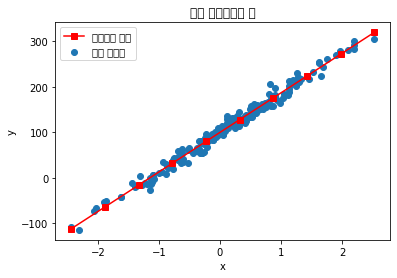

In [40]:
#선형 회귀를 통해 구한 가중치 벡터는 정답과 비슷하지만 똑같지는 않다
# 원래 데이터와 비교
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [36]:
'''
선형회귀 (Linear Regression) 분석(이어서)
 scikit-learn 패키지를 사용한 선형 회귀분석 - linear_model 서브 패키지의 LinearRegression 클래스를 사용
'''
from sklearn.linear_model import LinearRegression

#LinearRegression(fit_intercept=True) fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정
model = LinearRegression().fit(X0, y) # #가중치 값을 추정 (상수항 결합을 자동 수행됨)
#coef_ : 추정된 가중치 벡터 , intercept_ : 추정된 상수항
print(model.intercept_, model.coef_)
#새로운 입력 데이터에 대한 출력 데이터 예측
model.predict([[-2], [-1], [0], [1], [2]])

99.79150868986945 [86.96171201]


array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [41]:
'''
선형회귀 (Linear Regression) 분석(이어서)
 statsmodels 패키지 OLS 클래스를 사용한 선형 회귀분석
 1. 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다.
 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다.
 data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.
 2. fit 메서드로 모형 추정. 결과는 별도의 RegressionResults 클래스 객체로 출력된다.
 RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공한다.
 RegressionResults 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다.
 params: 가중치 벡터
 resid: 잔차 벡터
'''
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        11:15:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

C:\Users\student\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
'''
직선 학습
 사이킷런의 LinearRegression(선형 회귀)는 특성과 타깃 벡터 사이의 관계가 거의 선형이라고 가정합니다.
 타깃 벡터에 대한 특성의 효과(계수, 가중치, 파라미터)는 상수입니다.
 y는 타깃이고, xi는 하나의 특성 데이터입니다.
 B1과 B2는 모델을 훈련하여 찾아야 하는 계수입니다.
 e는 오차입니다.
'''
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston = load_boston() # 데이터를 로드하고 두 개의 특성만 선택
features = boston.data[:,0:2]
target = boston.target
regression = LinearRegression() # 선형 회귀 모델을 만듭니다.
model = regression.fit(features, target) # 선형 회귀 모델을 훈련합니다.


In [43]:
model.intercept_ # 편향을 확인합니다.


22.485628113468223

In [44]:
model.coef_ # 특성의 계수를 확인합니다.


array([-0.35207832,  0.11610909])

In [45]:
target[0]*1000 # 타깃 벡터의 첫 번째 값에 1000을 곱합니다.

24000.0

In [46]:
# 첫번째 특성은 인당 범죄율로서 이 특성의 모델 계수는 -0.35입니다.
# 타깃 벡터가 천 달러 단위의 주택 가격이므로 계수에 1,000을 곱하면 인구당 범죄율이 1만큼 증가될 때 주책 가격의 변화를 알 수 있습니다.

model.predict(features)[0]*1000 # 첫 번째 샘플의 타깃 값을 예측하고 1000을 곱합니다.
model.coef_[0]*1000 # 첫 번째 계수에 1000을 곱합니다.

#인구당 범죄율이 1씩 증가될 때마다 주택 가격은 $350 정도 감소한다

-352.07831564026776

In [47]:
'''
교차 특성 처리
 타킷 변수에 영향을 미치면서 다른 특성에 의존하는 특성이 있습니다.
 사이킷런의 PolynomialFeatures는 교차항을 만들어 의존성을 찾아줍니다.
 타깃 변수에 대한 특성의 영향이 부분적으로 또 다른 특성에 의존합니다.
 두 특성값의 곱을 포함하는 새로운 특성을 포함시켜 상호 작용을 나타낼 수 있습니다.
 PolynomialFeatures를 사용해 특성의 모든 조합에 대한 교차항을 만든 다음 모델 선택 전략을 사용해 최선의 모델
을 만드는 특성 조합과 교차항을 찾습니다.
 interaction_only=True를 지정하면 PolynomialFeatures가 교차항만 반환합니다.
 기본적으로 PolynomialFeatures를 절편이라고 부르는 1로 채워진 특성을 추가합니다.
 include_bias=False는 절편 1로 채워진 특성을 추가하지 않습니다.
'''
## 다중 공선성 문제를 파악한뒤, 그 문제가 아니라면 다항분석을 실시한다. 
## 다항 분석을 하려면 PolynomialFeatures를 통해 교차항을 만들고, 의존성을 먼저 찾아본다. 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston() # 데이터를 로드하고 두 개의 특성만 선택
features = boston.data[:,0:2]
target = boston.target

# 교차 항을 만듭니다.
interaction = PolynomialFeatures( degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)
regression = LinearRegression() # 선형 회귀 모델 객체 생성
model = regression.fit(features_interaction, target) # 선형 회귀 모델 훈련
features[0] # 첫 번째 샘플의 특성 값을 확인



array([6.32e-03, 1.80e+01])

In [49]:
import numpy as np
# 각 샘플에서 첫 번째와 두 번째 특성을 곱합니다.
interaction_term = np.multiply(features[:, 0], features[:, 1])
interaction_term[0] # 첫 번째 샘플의 교차 항을 확인.

0.11376

In [50]:
features_interaction[0] # 첫 번째 샘플의 값을 확인

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

In [107]:
## 다항분석에 대해 알아보자 
## 외부데이터를 통한 선형회귀분석을 해보자 
## 외부 데이터 auto-mpg.csv참고

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/auto-mpg.csv", header=None)
#컬럼 이름 지정
df.columns =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [108]:
df.info()  # 데이터 자료형 확인
df.describe()  # 데이터 통계 요약 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [54]:
#horsepower 열의 고유값 확인
print(df['horsepower'].unique())
# ?를 np.nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)
# 누락된 행 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
# 문자열을 실수형으로 변환
df['horsepower'] = df['horsepower'].astype('float')

df.describe()  # 요약정보 다시 확인 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


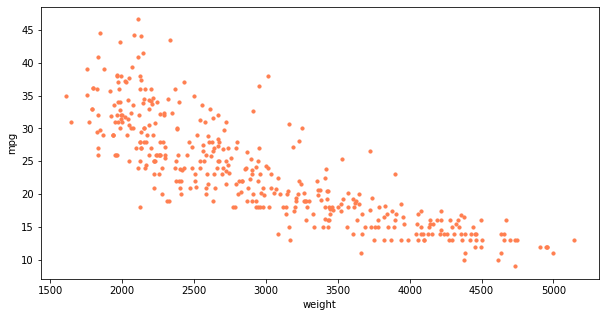

In [109]:
#분석에 활용할 열(속성, 특성) 선택 - 연비, 실린더, 마력, 무게
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

#종속변수 Y는 연비로 다른 변수는 독립변수로 선형관계 존재 확인을 위해 산점도로 출력
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

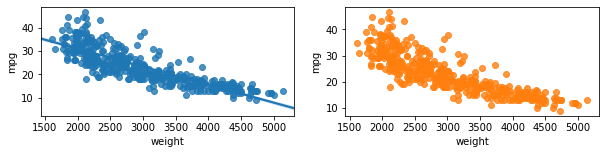

'\nhttps://wikidocs.net/4761\n'

In [110]:
#seaborn 으로 산점도 출력 
fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(1, 2, 1) #1x2(행x열) subplot 중 1번째 
ax2 = fig.add_subplot(1, 2, 2) #1x2(행x열) subplot 중 2번째

# subplot
# (2, 1, 1)은 2x1(행x열)의 subplot을 생성한다는 의미이고 
# 세 번째 인자 1은 생성된 두 개의 subplot 중 첫 번째 subplot을 의미

#seaborn으로 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
            #선형회귀 적합 선을 포함시키지 않으려면 fit_reg=False 를 설정

plt.show()
plt.close()
              

'''
https://wikidocs.net/4761
'''

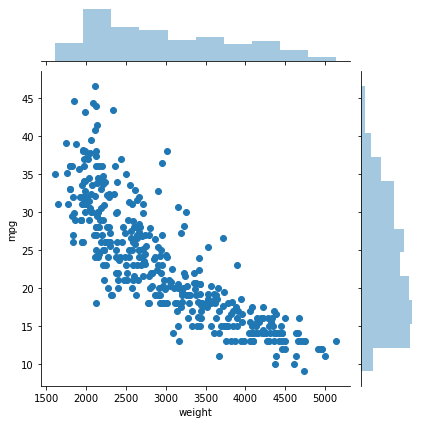

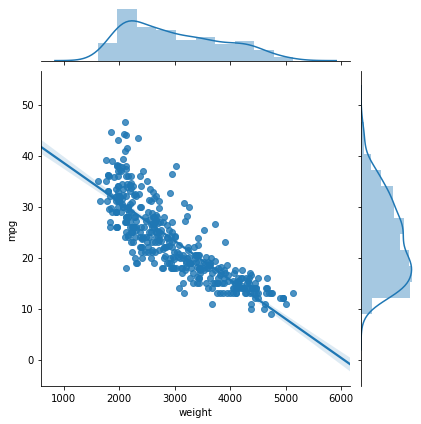

In [59]:
#seaborn으로 산점도와 히스토그램 표시 (조인트 그래프)
sns.jointplot(x='weight', y='mpg', data=ndf )  
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf )  #회귀선 표시
plt.show()
plt.close()

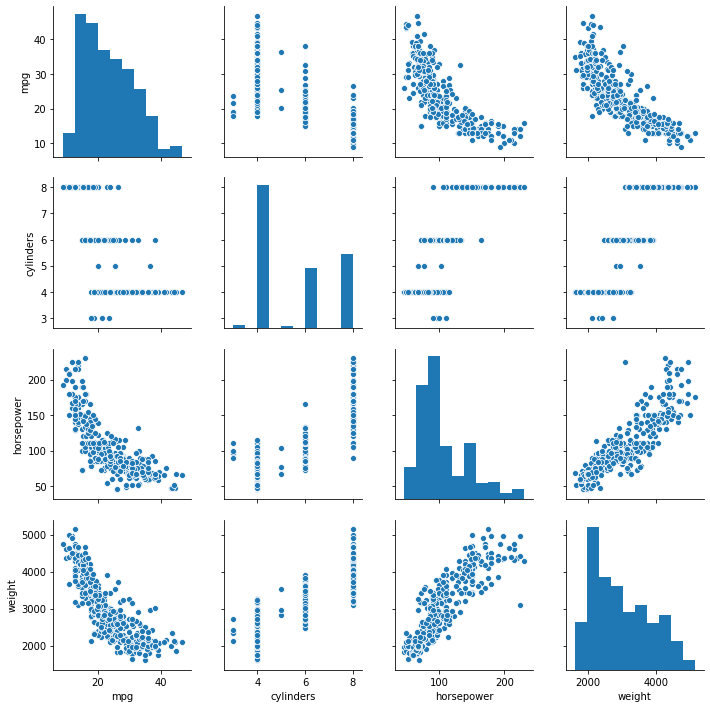

In [60]:
#seaborn으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)   
plt.show()
plt.close()

In [66]:
# 데이터 셋을 train과 test로 분리(종속변수는 mpg, 독립변수는 weight)
X=ndf[['weight']]
Y=ndf['mpg']

#test data set 비율 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=10)
#개수 확인
print('train  data 개수 : ', len(X_train))
print('test data 개수 : ',  len(X_test))

train  data 개수 :  274
test data 개수 :  118


In [69]:
#train 데이터 셋으로 선형 회귀 모델 생성 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 결정계수 출력(r^2)
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [70]:
# 계수(기울기)
print('기울기 :', lr.coef_  )

# 절편
print('절편 :',  lr.intercept_ )

기울기 : [-0.00775343]
절편 : 46.7103662572801


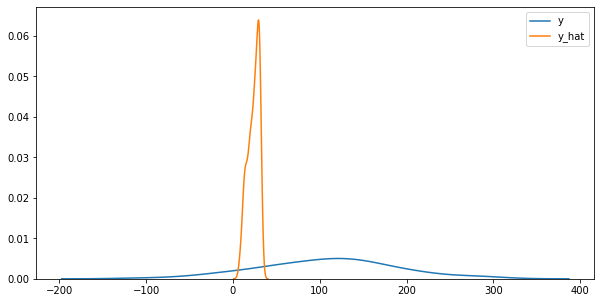

In [74]:
#예측값 생성
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label = "y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close() 

# 뾰족한 형태 
# mpg 에 영향을 주는 것은 weight하나뿐만이 아니다.(다항분석 실시 필요)


In [79]:
##비선형회귀분석 ############
#다항식으로 변환 클래스 : PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print('original data:', X_train.shape)
print('2차항 변환 data', X_train_poly.shape)

original data: (274, 1)
2차항 변환 data (274, 3)


In [81]:
# train data를 가지고 모형 학습 
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) #X_test데이터를 2차항으로 변형 
r_square = pr.score(X_test_poly, y_test)
print(r_square) 

0.7087009262975481


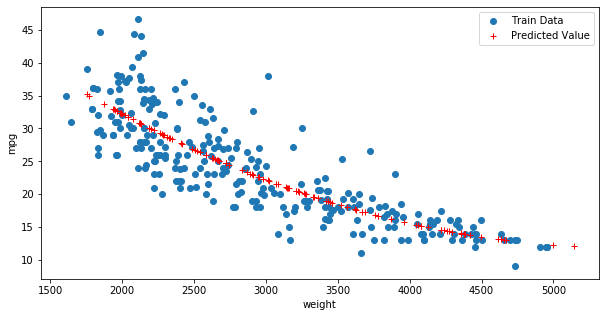

In [85]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

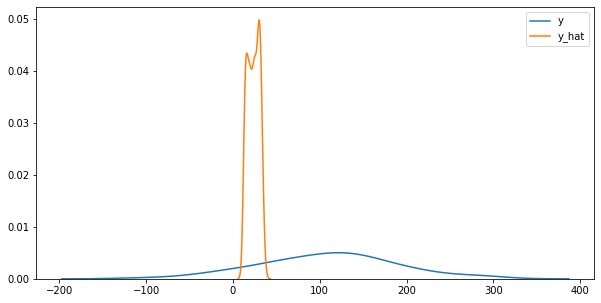

In [87]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [88]:
########다중 회귀 분석 ##############################
#종속변수를 설명하는 독립변수가 두개일 때 단순회귀모형을 설정한다면 모형설정(specification)이 부정확할 뿐 아니라 종속변수에 대한 중요한 설명변수(독립변수)를 누락함으로써 계수 추정량에 대해 편의(bias)를 야기 시킬 수 있으므로 단순회귀분석은 그 유용성을 상실하게 된다. 따라서 다중회귀분석을 통해 편의현상(bias)을 제거할 수 있다 

X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

결정계수: 0.6939048496695597
X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]
상수항 b: 46.414351269634075


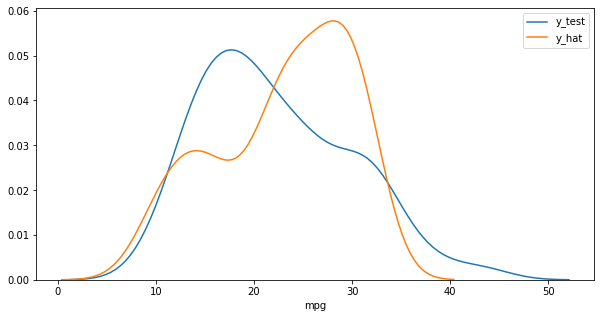

In [91]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   
# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('결정계수:', r_square)
 
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
 
# 회귀식의 y절편
print('상수항 b:', lr.intercept_)
 
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()


,VIF Factor,features
0,154.860110,Intercept
1,10.630870,cylinders
2,8.916017,horsepower
3,10.430271,weight
4,2.609487,acceleration
5,19.535061,displacement


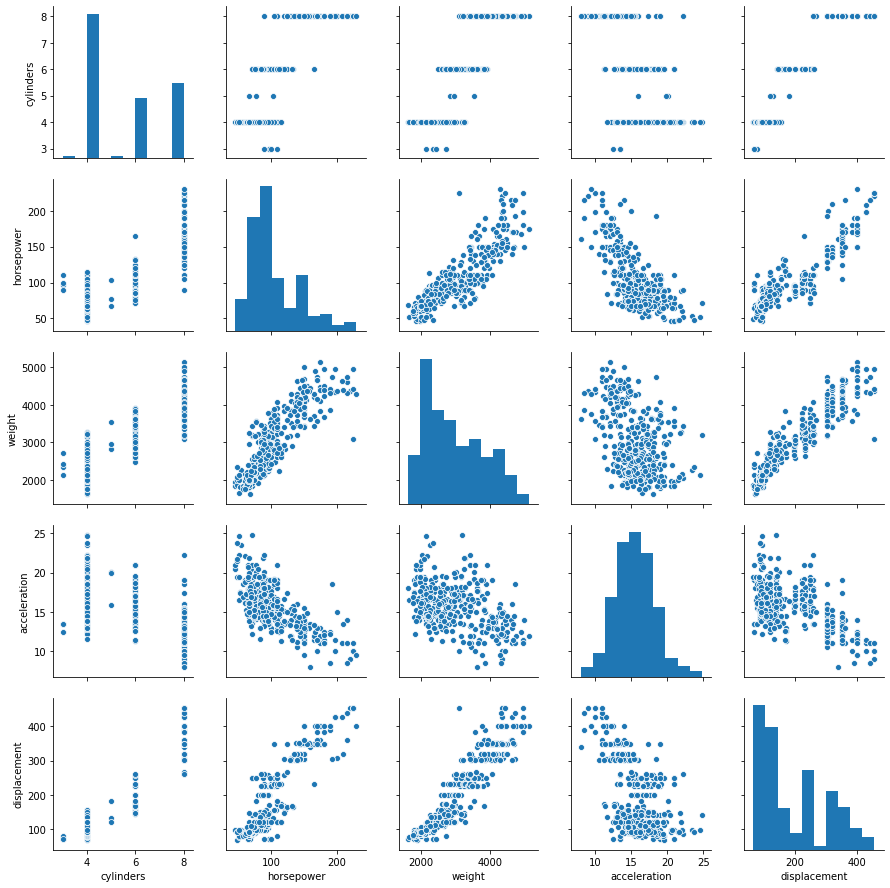

In [93]:
###############연습문제 #################################
'''
연비에 영향을 주는 독립변수들간의 산점도를 pairplot으로  독립변수들간의 높은상관성 존재 여부를 확인 (다중공선성 문제가 있는지 파악)
독립변수들간의 상관성 높은 특성중 하나만 선택하고 다른 하나는 삭제하는 방식으로 차원을 축소해서
다중 회귀 분석을 수행하고 R결정계수값이 더 개선되었는지 확인하시오
'''
#회귀 모델에 다중공선성이 있는지 파악하는 방법은 두 가지가 있습니다.
# 1. 산점도 그래프 (Scatter plot Matrix)
# 2. VIF (Variance Inflation Factors, 분산팽창요인)
#참고 코드 :
sns.pairplot(df[[ 'cylinders', 'horsepower', 'weight', 'acceleration', 'displacement']]) 

# 다중 공선성 확인 : variance_inflation_factor()
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('mpg ~ cylinders + horsepower + weight + acceleration + displacement', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

# 공선성이 있는 문제는 같이 있어서는 안된다. (해당 지표 중 하나만(혹은 하나씩)) 

In [ ]:
###########################(20200313)##################################

In [ ]:
## mpg데이터로 했던 내용을 복습해보자 
'''
비선형 관계 학습
 선형 회귀 모델에 다항 특성을 추가하여 다항 회귀를 만듭니다.
 다항 회귀는 선형 회귀의 확장하여 비선형 관계를 모델링합니다.
 다항 회귀는 다항 특성을 추가하여 이를 다항 함수로 변환합니다.
'''
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston() # 데이터를 로드하고 하나의 특성을 선택
features = boston.data[:,0:1]
target = boston.target

# 다항 특성 x^2와 x^3를 만듭니다.
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)

regression = LinearRegression() # 선형 회귀 모델 객체 생성
model = regression.fit(features_polynomial, target) # 선형 회귀 모델 훈련

features[0] # 첫 번째 샘플을 확인
features[0]**2 # 첫 번째 샘플을 x^2로 거듭제곱합니다.
features[0]**3 # 첫 번째 샘플을 x^2로 세제곱합니다.
features_polynomial[0] # 첫 번째 샘플의 x, x^2,x^3 값을 확인

In [12]:
'''
규제로 분산 축소
 정규화는 정규화항을 통해 모델에 미치는 차원의 수의 수를 감소시키기 때문에 overfitting을 방지하게 됩니다.
 일반적인 회귀방법에서 비용함수는 MSE를 최소화하는 방향으로 나아가게 됩니다. 
  일반적인 회귀방법에서 데이터의 특징수가 많아질수록(차원이 증가할수록) 
  overfitting에 대한 위험성이 커지게 됩니다.
 이를 막기위해 정규화 항을 사용하게 되는데요. MSE(평균제곱오차) + regular-term으로 비용함수를
  재정의하게 됩니다.
 비용함수를 최소화하는 방향에선 regular-term또한 최소화가 되어야 할겁니다.
 최소화를 진행하게 되면서 가중치가 낮은 항은 정규화 방법에 따라 0으로 수렴하여 
  사용하지 않게되거나 0에 가까운 수가 되어 모델에 미치는 영향이 덜해지게 됩니다.
'''
'''
 릿지 회귀 : L2-Norm을 사용한 회귀입니다. 이 회귀방법은 일반적으로 영향을 거의 미치지 않는 특성에 대하여 0
에 가까운 가중치를 주게 됩니다.
 라쏘 회귀 : L1-Norm을 사용한 회귀입니다. 특성값의 계수가 매우 낮다면 0으로 수렴하게 하여 특성을 지워버립
니다. 특성이 모델에 미치는 영향을 0으로 만든다는 것은 bias를 증가 시켜 overfitting을 방지한다는 의미가 됩니다.
 엘라스틱 넷 : 라쏘회귀와 릿지회귀의 최적화 지점이 서로 다르기 때문에 두 정규화 항을 합쳐서 r로 규제정도를
조절하여 준다.
'''

'''
 리지 회귀나 라소 회귀와 같이 축소 페널티가 포함된 학습 알고리즘을 사용합니다.
 선형 회귀에서는 모델이 정답(Yi)과 예측(yi) 사이의 제곱 오차 합 또는 잔차 제곱합(RSS)을 최소화하기 위해 훈련합
니다
'''
## 사이킷런에서 Ridge 클래스를 제공받아 사용해보자 
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 데이터 로드
features = boston.data
target = boston.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
regression = Ridge(alpha=0.5) # alpha 값을 지정한 릿지 회귀를 만듭니다.
model = regression.fit(features_standardized, target) # 선형 회귀 모델을 훈련합니다.

#학습결과 확인(score, coef_, alpha_)
print("결정계수:", model.score(features_standardized, target))
print(model.coef_)

결정계수: 0.7406395408018003
[-0.92396151  1.07393055  0.12895159  0.68346136 -2.0427575   2.67854971
  0.01627328 -3.09063352  2.62636926 -2.04312573 -2.05646414  0.8490591
 -3.73711409]


In [13]:
'''
규제로 분산 축소(이어서)
 RSS와 전체 계숫값의 합인 페널티를 최소화합니다.
 모델을 축소시키려는 경향이 있기 때문에 페널티를 축소 페널티라고 부릅니다.
 규제를 적용한 선형 회귀 - 리지 회귀, 라소 회귀
 리지 회귀에서 축소 페널티는 모든 계수의 제곱합에 튜닝 파라미터를 곱한 것입니다.
'''
# 최적의 alpha값을 찾아보자 
from sklearn.linear_model import RidgeCV

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0]) # 세 개의 alpha 값에 대한 릿지 회귀 객체 생성
model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
model_cv.coef_ # 계수 확인
model_cv.alpha_ # alpha 값을 확인

1.0

In [14]:
# k-fold 적용 
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5) # 5-폴드 교차검증을 사용하여 릿지 회귀 객체 생성
model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델을 훈련합니다.
model_cv.alpha_ # alpha 값을 확인

10.0

In [15]:
'''
규제로 분산 축소(라소 회귀)
 라소 회귀는 축소 페널티가 모든 계수의 절댓값 합에 튜닝 하이퍼라미터를 곱한 것입니다.
 리지 회귀가 라소보다 조금 더 좋은 예측을 만듭니다.
 라소 회귀는 더 이해하기 쉬운 모델을 만듭니다.
 리지와 라소 페널티 사이에 균형을 맞추고 싶다면 엘라스틱 넷을 사용할 수 있습니다.
 리지와 라소 회귀는 최소화하려는 손실 함수에 계숫값을 포함시킴으로써 크고 복잡한 모델을 만듭니다.
 하이퍼파라미터 a는 계수를 얼마나 불리하게 만들지 조절합니다.
 a값이 클수록 더 간단한 모델을 만듭니다.
 이상적인 a 값을 구하려면 다른 하이퍼라미터와 같이 튜닝해야만 합니다.
 a는 alpha 매개변수를 사용해 지정합니다.
 사이킷런의 RidgeCV 클래스를 사용하면 좋은 a값을 선택할 수 있습니다.
 RidgeCV 클래스의 cv 매개변수를 사용해 교차검증 방식을 지정할 수 있습니다.
 기본값은 None으로 LOOCV 방식을 사용합니다.
 정수를 지정하면 GridSearchCV를 사용하여 교차검증을 수행합니다.
'''
'''
라쏘 회귀로 특성 축소 
 라소 회귀를 사용하여 특성 수를 줄여 선형 회귀 모델을 단순화 할 수 있습니다
 모델의 계수를 0까지 축소시킬 수 있습니다.
 RSS와 전체 계숫값의 합인 페널티를 최소화합니다.
'''
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 데이터 로드
features = boston.data
target = boston.target
scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

regression = Lasso(alpha=0.5) # alpha 값을 지정한 라쏘 회귀 객체 생성
model = regression.fit(features_standardized, target) # 선형 회귀 모델 훈련

model.coef_ # 계수 확인



array([-0.11526463,  0.        , -0.        ,  0.39707879, -0.        ,
        2.97425861, -0.        , -0.17056942, -0.        , -0.        ,
       -1.59844856,  0.54313871, -3.66614361])

In [16]:
regression_a10 = Lasso(alpha=10) # 큰 alpha 값을 지정한 라쏘 회귀 객체 생성
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_ #전부 0으로 됨 
                #규제값을 너무 크게 준 것 

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [21]:
'''
라쏘 회귀로 특성 축소(이어서)
 alpha값이 너무 크게 증가하면 어떤 특성도 사용되지 않습니다.
 라소의 alpha 값을 찾기 위해 LassoCV 클래스를 사용할 수 있습니다. (cv 매개변수 기본값은 3으로 3-폴드 교차검
증을 사용합니다.)
 LassoCV는 alphas 매개변수에 탐색할 값을 명시적으로 지정하지 않고 n_alphs 매개변수를 사용해 자동으로 탐색
대상 값을 생성할 수 있습니다.
'''
from sklearn.linear_model import LassoCV
# 세 개의 alpha 값에 대한 라쏘 회귀를 만듭니다.
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

model_cv = lasso_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
print(model_cv.coef_) # 계수를 확인
print(model_cv.alpha_) # alpha 값을 확인


# 1000개의 alpha 값을 탐색하는 라쏘 회귀를 만듭니다.
lasso_cv = LassoCV(n_alphas=1000, cv=5)

model_cv = lasso_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
print(model_cv.alpha_) # 계수를 확인
print(lasso_cv.alphas_) # alpha 값을 확인(탐색 대상이 되는 alpha값 목록)

#### 이후 분류분석에 대해 알아보도록 하자(logistic, perceptron, randomforest, SVM, KNN 등)
    

[-0.63230364  0.70840931 -0.          0.65760723 -1.57419335  2.82626903
 -0.         -2.42207901  1.19593681 -0.84646778 -1.92249345  0.76216539
 -3.72618383]
0.1
0.15326173083090813
[6.77765364 6.73095006 6.68456831 6.63850616 6.59276142 6.54733189
 6.50221542 6.45740983 6.41291299 6.36872277 6.32483706 6.28125375
 6.23797077 6.19498605 6.15229752 6.10990315 6.06780092 6.0259888
 5.98446481 5.94322695 5.90227325 5.86160175 5.82121052 5.78109761
 5.74126112 5.70169913 5.66240975 5.62339112 5.58464135 5.5461586
 5.50794102 5.4699868  5.43229411 5.39486116 5.35768615 5.32076731
 5.28410287 5.24769107 5.21153018 5.17561847 5.13995423 5.10453573
 5.0693613  5.03442925 4.99973792 4.96528563 4.93107075 4.89709163
 4.86334666 4.82983422 4.79655271 4.76350054 4.73067612 4.69807789
 4.66570428 4.63355376 4.60162478 4.56991582 4.53842536 4.50715189
 4.47609393 4.44524998 4.41461857 4.38419823 4.35398751 4.32398498
 4.29418918 4.2645987  4.23521213 4.20602805 4.17704507 4.14826181
 4.11967689 4.